# Soccer Data and Nueral Networks
##### Aaron Ashery

#### First set up our helper functions

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
# generalized version that plots validation data if available

def plot_history(history):
    loss_values = history.history['loss']
    accuracy_values = history.history['accuracy']
    validation = 'val_loss' in history.history
    if validation:
        val_loss_values = history.history['val_loss']
        val_accuracy_values = history.history['val_accuracy']
    epoch_nums = range(1, len(loss_values)+1)
    plt.figure(figsize=(12,4)) # width, height in inches
    plt.subplot(1, 2, 1)
    if validation:
        plt.plot(epoch_nums, loss_values, 'r', label="Training loss")
        plt.plot(epoch_nums, val_loss_values, 'r--', label="Validation loss")
        plt.title("Training/validation loss")
        plt.legend()
    else:
        plt.plot(epoch_nums, loss_values, 'r', label="Training loss")
        plt.title("Training loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.subplot(1, 2, 2)
    if validation:
        plt.plot(epoch_nums, accuracy_values, 'b', label='Training accuracy')
        plt.plot(epoch_nums, val_accuracy_values, 'b--', label='Validation accuracy')
        plt.title("Training/validation accuracy")
        plt.legend()
    else:
        plt.plot(epoch_nums, accuracy_values, 'b', label='Training accuracy')
        plt.title("Training accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.show()

In [4]:
def show_result(n):
    network_answer = np.argmax(outputs[n])
    correct_answer = np.argmax(test_targets[n])
    if network_answer == correct_answer:
        print("network correctly classified image #{} as '{}'".format(n, network_answer))
    else:
        print("network misclassified game #{} as '{}'".format(n, network_answer))
        print("The correct answer is '{}'".format(correct_answer))

In [5]:
def read_dataset(patterns_filename, targets_filename):
    with open(patterns_filename) as file:
        patterns = [[float(x) for x in line.split()] for line in file]
    with open(targets_filename) as file:
        targets = [int(line) for line in file]
    return patterns, targets

## Part 1: Determining the outcome of a soccer game using data AFTER the game takes place

In [6]:
sData, sResult = read_dataset("trainingDataNoDraws.txt", "trainingTargetNoDraws.txt")
training_set, training_targets = sData[0:20000], sResult[0:20000] #
testing_set, testing_targets = sData[20000:26262],sResult[20000:26262]

train_data = np.array(training_set)
train_targets = np.array(training_targets)
train_targets = to_categorical(train_targets)

test_data = np.array(testing_set)
test_targets = np.array(testing_targets)
test_targets = to_categorical(test_targets)

In [7]:
train_data, train_data.shape

(array([[14., 14.,  7., ...,  3.,  6.,  3.],
        [15., 12.,  7., ...,  9.,  6.,  7.],
        [ 9.,  9.,  4., ..., 18.,  2.,  3.],
        ...,
        [15., 13.,  3., ..., 10.,  5.,  6.],
        [12., 13.,  5., ..., 11.,  4.,  4.],
        [12.,  8.,  5., ...,  9.,  5.,  4.]]),
 (20000, 8))

##### The eight data points are Shots, Shots on Target, Fouls, and Corners. (Two of each for Home and Away)

In [8]:
train_targets, train_targets.shape

(array([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 (20000, 2))

##### To begin and make it simple we are only looking at games that ended in a win for either the home or away team (No Draws)

In [9]:
network = Sequential()
network.add(Flatten(input_shape=(8,)))
network.add(Dense(10, activation='sigmoid', name='hidden', input_shape=(8,)))
network.add(Dense(2, activation='sigmoid', name='output'))

In [10]:
network.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

In [11]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
hidden (Dense)               (None, 10)                90        
_________________________________________________________________
output (Dense)               (None, 2)                 22        
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


In [12]:
network.evaluate(test_data,test_targets)

165/165 [==============================] - 1s 2ms/step - loss: 0.2624 - accuracy: 0.3959


[0.26306024193763733, 0.3896571397781372]

In [13]:
history = network.fit(train_data, train_targets, epochs=10)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.2349 - accuracy: 0.5960
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2067 - accuracy: 0.6962
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1835 - accuracy: 0.7434
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1696 - accuracy: 0.7592
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1640 - accuracy: 0.7660
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1623 - accuracy: 0.7659
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1613 - accuracy: 0.7653
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1609 - accuracy: 0.7664
Epoch 9/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1602 - accuracy: 0.7674
Epoch 10/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1593 - accuracy: 0.7686

In [14]:
network.evaluate(train_data,train_targets)

625/625 [==============================] - 2s 2ms/step - loss: 0.1588 - accuracy: 0.7670


[0.15876264870166779, 0.7670000195503235]

In [15]:
network.evaluate(test_data,test_targets)

165/165 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.7774


[0.15292538702487946, 0.7774199843406677]

#### 77.5% of Games Predicted Correctly

### Adding in Draws

In [16]:
sData, sResult = read_dataset("trainingData.txt", "trainingTarget.txt")
training_set, training_targets = sData[0:30000], sResult[0:30000] #
testing_set, testing_targets = sData[30000:34000],sResult[30000:34000]

train_data = np.array(training_set)
train_targets = np.array(training_targets)
train_targets = to_categorical(train_targets)

test_data = np.array(testing_set)
test_targets = np.array(testing_targets)
test_targets = to_categorical(test_targets)

In [17]:
train_data, train_data.shape

(array([[14., 14.,  7., ...,  3.,  6.,  3.],
        [15., 12.,  7., ...,  9.,  6.,  7.],
        [ 9.,  9.,  4., ..., 18.,  2.,  3.],
        ...,
        [15., 12.,  8., ..., 15.,  8.,  7.],
        [ 9.,  9.,  4., ..., 10.,  6.,  6.],
        [22., 11.,  5., ..., 21.,  9.,  1.]]),
 (30000, 8))

##### Notice we have many more games to look at now

In [18]:
train_targets, train_targets.shape

(array([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=float32),
 (30000, 3))

##### Notice now there are 3 possible outputs in the target vectors

In [19]:
network = Sequential()
network.add(Flatten(input_shape=(8,)))
network.add(Dense(10, activation='relu', name='hidden', input_shape=(8,)))
network.add(Dense(3, activation='softmax', name='output'))

In [20]:
network.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy']) #'mean_squared_error'

In [21]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
hidden (Dense)               (None, 10)                90        
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [22]:
network.evaluate(test_data,test_targets)

125/125 [==============================] - 1s 2ms/step - loss: 12.1289 - accuracy: 0.2677


[12.200224876403809, 0.26600000262260437]

In [23]:
history = network.fit(train_data, train_targets, epochs=10)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 1.7796 - accuracy: 0.4155
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.9354 - accuracy: 0.5606
Epoch 3/10
938/938 [==============================] - 1s 2ms/step - loss: 0.9211 - accuracy: 0.5667
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9199 - accuracy: 0.5668
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9196 - accuracy: 0.5676
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9186 - accuracy: 0.5688
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9199 - accuracy: 0.5667
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9189 - accuracy: 0.5699
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9187 - accuracy: 0.5689
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9188 - accuracy: 0.5707

In [24]:
network.evaluate(train_data,train_targets)

938/938 [==============================] - 2s 2ms/step - loss: 0.9224 - accuracy: 0.5651


[0.9224361777305603, 0.5651333332061768]

In [25]:
network.evaluate(test_data,test_targets)

125/125 [==============================] - 0s 1ms/step - loss: 0.8964 - accuracy: 0.5755


[0.896381676197052, 0.5755000114440918]

#### About 57% of Games Predicted Correctly

### Predicting the chance the Home Team will win

In [26]:
sData, sResult = read_dataset("trainingData_hOdds.txt", "trainingTarget_hOdds.txt")
training_set, training_targets = sData[0:30000], sResult[0:30000] #
testing_set, testing_targets = sData[30000:34000],sResult[30000:34000]

train_data = np.array(training_set)
train_targets = np.array(training_targets)
train_targets = train_targets / 100

test_data = np.array(testing_set)
test_targets = np.array(testing_targets)
test_targets = test_targets / 100

In [27]:
train_data, train_data.shape

(array([[14., 14.,  7., ...,  3.,  6.,  3.],
        [15., 12.,  7., ...,  9.,  6.,  7.],
        [ 9.,  9.,  4., ..., 18.,  2.,  3.],
        ...,
        [22., 11.,  5., ..., 21.,  9.,  1.],
        [10., 14.,  4., ..., 12.,  3.,  6.],
        [16.,  8.,  4., ..., 16.,  5.,  8.]]),
 (30000, 8))

In [28]:
train_targets, train_targets.shape

(array([0.55, 0.5 , 0.62, ..., 0.54, 0.32, 0.39]), (30000,))

#### These numbers are given by Bet365, they are the gambling odds that the home team will win the game
#### The goal here is to train our network to produce similar odds, since the targets are proven to be very accurate; and to use regression, since we want our network to produce a number rather than a category

In [29]:
network = Sequential()
network.add(Flatten(input_shape=(8,)))
network.add(Dense(30, activation='relu', name='hidden', input_shape=(8,)))
network.add(Dense(30, activation='relu', name='hidden2', input_shape=(8,)))
network.add(Dense(1, activation='sigmoid', name='output'))

In [30]:
network.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy']) #'mean_squared_error'

In [31]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
hidden (Dense)               (None, 30)                270       
_________________________________________________________________
hidden2 (Dense)              (None, 30)                930       
_________________________________________________________________
output (Dense)               (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [32]:
network.evaluate(test_data,test_targets)

125/125 [==============================] - 1s 1ms/step - loss: 0.3052 - accuracy: 0.0000e+00


[0.3003138601779938, 0.0]

In [33]:
network.predict(test_data)[0]

array([0.99505186], dtype=float32)

#### The accuracy function isn't going to work for this since our network won't be able to output a number exactly the same as the target, we need a tolerance

In [34]:
def my_accuracy(test_data, test_targets, tolerance, p): #have a premade list for it to go way faster
    correct = 0
    for i in range(len(test_data)):
        if abs(test_targets[i] - p[i][0]) <= tolerance:
            correct += 1
        else:
            pass
    print((correct / len(test_data)*100))
        

In [35]:
predictions = network.predict(test_data)

my_accuracy(test_data, test_targets, .05, predictions)

my_accuracy(test_data, test_targets, .1, predictions)

0.375
1.125


In [36]:
history = network.fit(train_data, train_targets, epochs=30)

Epoch 1/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0251 - accuracy: 0.0000e+00
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0207 - accuracy: 0.0000e+00
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0200 - accuracy: 0.0000e+00
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 8/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0197 - accuracy: 0.0000e+00
Epoch 9/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0197 - accuracy: 0.0000e+00
Epoch 10/30
938/938 [==============================] - 2s 2ms/st

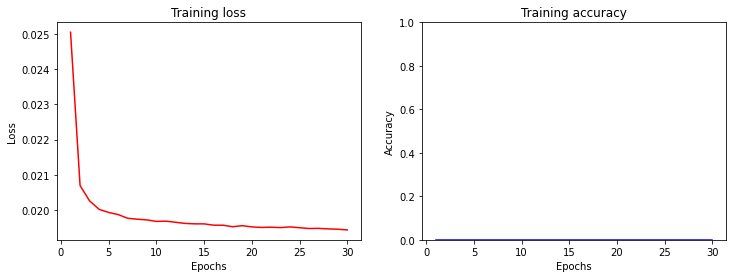

In [37]:
plot_history(history)

In [38]:
predictions = network.predict(test_data)

my_accuracy(test_data, test_targets, .05, predictions)
my_accuracy(test_data, test_targets, .075, predictions)
my_accuracy(test_data, test_targets, .1, predictions)
my_accuracy(test_data, test_targets, .25, predictions)

27.525
40.9
52.025
92.125


#### I consider within 5% to be correct, which would mean this network has an accuracy of around 30%
#### Even so, as the tolerance is relaxed the networks performance improves drastically and with a tolerance of 25% is around 90% accurate

## Part 2: Predicting the outcome of every game in the 2018-2019 English Premier League by looking at the competing teams' data from the 2017-2018 season

In [39]:
sData, sResult = read_dataset("NN4Data.txt", "NN4Targets.txt")
training_set, training_targets = sData[0:200], sResult[0:200] 
testing_set, testing_targets = sData[200:380],sResult[200:380]

train_data = np.array(training_set)
train_data = train_data / 38
train_targets = np.array(training_targets)
train_targets = to_categorical(train_targets)

test_data = np.array(testing_set)
test_data = test_data / 38
test_targets = np.array(testing_targets)
test_targets = to_categorical(test_targets)

#### There are 20 teams in the English Premier League and every team plays each other leading to 380 games total

In [40]:
train_data, train_data.shape

(array([[ 1.78947368,  0.73684211, 13.5       , ...,  9.65789474,
          5.34210526,  5.68421053],
        [ 1.18421053,  1.60526316, 12.28947368, ..., 15.23684211,
          5.92105263,  3.63157895],
        [ 2.07894737,  1.21052632, 16.73684211, ..., 10.89473684,
          5.5       ,  5.5       ],
        ...,
        [ 1.78947368,  0.73684211, 13.5       , ..., 11.55263158,
          5.73684211,  5.57894737],
        [ 1.18421053,  1.44736842, 12.5       , ..., 10.97368421,
          6.05263158,  4.18421053],
        [ 0.97368421,  1.47368421, 11.86842105, ...,  9.63157895,
          7.47368421,  2.71052632]]),
 (200, 20))

##### There are now 20 data points, 10 for each team competing
##### Examples of data points are goals per game, goals allowed per game, shots per game...

In [41]:
train_targets.shape

(200, 3)

In [42]:
network = Sequential()
network.add(Flatten(input_shape=(20,)))
network.add(Dense(10, activation='relu', name='hidden', input_shape=(20,)))
network.add(Dense(3, activation='softmax', name='output'))

In [43]:
network.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #'mean_squared_error'

In [44]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 20)                0         
_________________________________________________________________
hidden (Dense)               (None, 10)                210       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [45]:
network.evaluate(test_data,test_targets)

6/6 [==============================] - 1s 2ms/step - loss: 6.1705 - accuracy: 0.3165


[6.083376884460449, 0.3222222328186035]

In [46]:
history = network.fit(train_data, train_targets, epochs=15,batch_size=8)

Epoch 1/15
25/25 [==============================] - 1s 2ms/step - loss: 1.8285 - accuracy: 0.3950
Epoch 2/15
25/25 [==============================] - 0s 2ms/step - loss: 1.1803 - accuracy: 0.3800
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: 1.1057 - accuracy: 0.4050
Epoch 4/15
25/25 [==============================] - 0s 2ms/step - loss: 1.0942 - accuracy: 0.4500
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 1.0796 - accuracy: 0.4050
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: 1.0532 - accuracy: 0.4600
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 1.0495 - accuracy: 0.4850
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 1.0323 - accuracy: 0.4850
Epoch 9/15
25/25 [==============================] - 0s 2ms/step - loss: 1.0172 - accuracy: 0.5150
Epoch 10/15
25/25 [==============================] - 0s 2ms/step - loss: 1.0228 - accuracy: 0.5050
Epoch 11/15
25/25 [

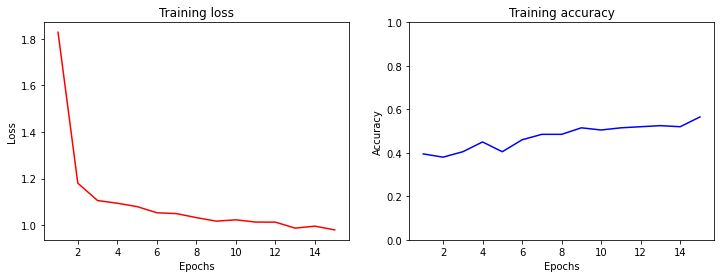

In [47]:
plot_history(history)

In [48]:
network.evaluate(train_data,train_targets)

7/7 [==============================] - 0s 2ms/step - loss: 0.9583 - accuracy: 0.5500


[0.9583464860916138, 0.550000011920929]

In [49]:
network.evaluate(test_data, test_targets)

6/6 [==============================] - 0s 2ms/step - loss: 0.9620 - accuracy: 0.5111


[0.9619849324226379, 0.5111111402511597]

#### Predicted the season around 50% accurately

In [50]:
outputs = network.predict(test_data)

show_result(random.randrange(180))

network misclassified game #163 as '1'
The correct answer is '0'


### Now adding 7 more european leagues:

In [51]:
sData, sResult = read_dataset("NN6Data.txt", "NN7Targets.txt")
training_set, training_targets = sData[0:3000], sResult[0:3000] 
testing_set, testing_targets = sData[3000:4197],sResult[3000:4197]

train_data = np.array(training_set)
train_data = train_data / 38
train_targets = np.array(training_targets)
train_targets = to_categorical(train_targets)

test_data = np.array(testing_set)
test_data = test_data / 38
test_targets = np.array(testing_targets)
test_targets = to_categorical(test_targets)

In [52]:
train_data, train_data.shape

(array([[ 1.26315789,  1.84210526, 11.97368421, ..., 13.34210526,
          6.10526316,  6.97368421],
        [ 0.76315789,  1.39473684, 10.47368421, ..., 11.97368421,
          5.13157895,  3.65789474],
        [ 1.5       ,  1.57894737, 12.31578947, ..., 12.44736842,
          7.5       ,  4.81578947],
        ...,
        [ 1.15789474,  1.31578947, 12.52631579, ..., 15.02631579,
          4.02631579,  5.10526316],
        [ 1.57894737,  1.60526316, 10.92105263, ..., 13.55263158,
          4.76315789,  4.73684211],
        [ 1.15789474,  1.52631579,  9.47368421, ...,  8.52631579,
          6.05263158,  3.31578947]]),
 (3000, 20))

In [53]:
train_targets, train_targets.shape

(array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=float32),
 (3000, 3))

In [54]:
network = Sequential()
network.add(Flatten(input_shape=(20,)))
network.add(Dense(30, activation='relu', name='hidden', input_shape=(20,)))
network.add(Dense(30, activation='relu', name='hidden2', input_shape=(20,)))
network.add(Dense(3, activation='softmax', name='output'))

In [55]:
network.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #'mean_squared_error'

In [56]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 20)                0         
_________________________________________________________________
hidden (Dense)               (None, 30)                630       
_________________________________________________________________
hidden2 (Dense)              (None, 30)                930       
_________________________________________________________________
output (Dense)               (None, 3)                 93        
Total params: 1,653
Trainable params: 1,653
Non-trainable params: 0
_________________________________________________________________


In [57]:
network.evaluate(test_data,test_targets)

38/38 [==============================] - 0s 3ms/step - loss: 1.7603 - accuracy: 0.2945


[1.7141402959823608, 0.2882205545902252]

In [58]:
history = network.fit(train_data, train_targets, epochs=50)

Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 1.3044 - accuracy: 0.4123
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0650 - accuracy: 0.4513
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0466 - accuracy: 0.4580
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 1.0452 - accuracy: 0.4560
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0434 - accuracy: 0.4557
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0381 - accuracy: 0.4650
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0420 - accuracy: 0.4613
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0399 - accuracy: 0.4577
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0390 - accuracy: 0.4660
Epoch 10/50
94/94 [==============================] - 0s 3ms/step - loss: 1.0357 - accuracy: 0.4743
Epoch 11/50
94/94 [

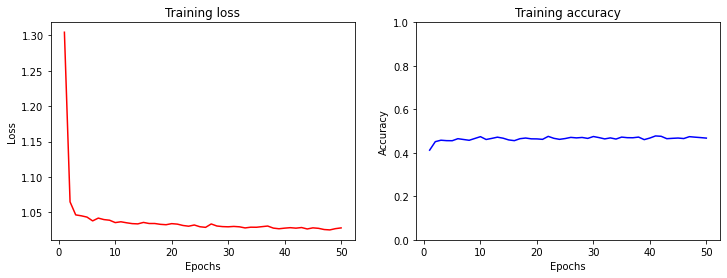

In [59]:
plot_history(history)

In [60]:
network.evaluate(train_data,train_targets)

94/94 [==============================] - 0s 1ms/step - loss: 1.0200 - accuracy: 0.4713


[1.019955039024353, 0.4713333249092102]

In [61]:
network.evaluate(test_data, test_targets)

38/38 [==============================] - 0s 1ms/step - loss: 1.0247 - accuracy: 0.4979


[1.0247248411178589, 0.4979114532470703]

#### Predicted the seasons around 48% accurately

In [62]:
outputs = network.predict(test_data)

show_result(random.randrange(len(test_targets)))

network misclassified game #1094 as '0'
The correct answer is '1'


##### Same problem as before not predicting draws

## Part 3: Using Regression To Determine a Percentage Chance That the Home Team Will Win

In [63]:
sData, sResult = read_dataset("NN4Data.txt", "NN5Targets.txt")
training_set, training_targets = sData[0:200], sResult[0:200] #
testing_set, testing_targets = sData[200:380],sResult[200:380]

train_data = np.array(training_set)
train_data = train_data / 38
train_targets = np.array(training_targets)
train_targets = train_targets / 100

test_data = np.array(testing_set)
test_data = test_data / 38
test_targets = np.array(testing_targets)
test_targets = test_targets / 100

In [64]:
train_data, train_data.shape

(array([[ 1.78947368,  0.73684211, 13.5       , ...,  9.65789474,
          5.34210526,  5.68421053],
        [ 1.18421053,  1.60526316, 12.28947368, ..., 15.23684211,
          5.92105263,  3.63157895],
        [ 2.07894737,  1.21052632, 16.73684211, ..., 10.89473684,
          5.5       ,  5.5       ],
        ...,
        [ 1.78947368,  0.73684211, 13.5       , ..., 11.55263158,
          5.73684211,  5.57894737],
        [ 1.18421053,  1.44736842, 12.5       , ..., 10.97368421,
          6.05263158,  4.18421053],
        [ 0.97368421,  1.47368421, 11.86842105, ...,  9.63157895,
          7.47368421,  2.71052632]]),
 (200, 20))

In [65]:
test_targets, test_data.shape

(array([0.13, 0.5 , 0.75, 0.5 , 0.51, 0.17, 0.47, 0.78, 0.38, 0.49, 0.29,
        0.51, 0.44, 0.82, 0.44, 0.42, 0.09, 0.49, 0.57, 0.85, 0.83, 0.42,
        0.32, 0.77, 0.51, 0.36, 0.61, 0.42, 0.19, 0.05, 0.82, 0.48, 0.42,
        0.25, 0.05, 0.78, 0.6 , 0.42, 0.82, 0.19, 0.49, 0.83, 0.31, 0.39,
        0.39, 0.69, 0.42, 0.75, 0.28, 0.12, 0.1 , 0.49, 0.18, 0.43, 0.57,
        0.82, 0.17, 0.48, 0.67, 0.59, 0.59, 0.32, 0.51, 0.35, 0.17, 0.55,
        0.44, 0.67, 0.32, 0.47, 0.53, 0.2 , 0.27, 0.31, 0.86, 0.53, 0.43,
        0.69, 0.78, 0.54, 0.36, 0.69, 0.49, 0.47, 0.67, 0.08, 0.39, 0.15,
        0.17, 0.22, 0.36, 0.86, 0.64, 0.29, 0.55, 0.28, 0.42, 0.65, 0.86,
        0.49, 0.32, 0.65, 0.08, 0.25, 0.54, 0.69, 0.39, 0.31, 0.39, 0.05,
        0.69, 0.11, 0.62, 0.74, 0.25, 0.58, 0.69, 0.94, 0.8 , 0.11, 0.48,
        0.2 , 0.38, 0.33, 0.75, 0.6 , 0.82, 0.38, 0.71, 0.53, 0.2 , 0.43,
        0.09, 0.6 , 0.31, 0.5 , 0.61, 0.77, 0.39, 0.3 , 0.57, 0.23, 0.31,
        0.06, 0.65, 0.8 , 0.78, 0.44, 

In [66]:
network = Sequential()
network.add(Flatten(input_shape=(20,)))
network.add(Dense(30, activation='relu', name='hidden', input_shape=(20,)))
network.add(Dense(30, activation='relu', name='hidden2', input_shape=(20,)))
network.add(Dense(10, activation='relu', name='hidden4', input_shape=(20,)))
network.add(Dense(1, activation='sigmoid', name='output'))

In [67]:
network.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy']) #'mean_squared_error'

In [68]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 20)                0         
_________________________________________________________________
hidden (Dense)               (None, 30)                630       
_________________________________________________________________
hidden2 (Dense)              (None, 30)                930       
_________________________________________________________________
hidden4 (Dense)              (None, 10)                310       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = network.fit(train_data, train_targets, epochs=75, batch_size=64)

Epoch 1/75
4/4 [==============================] - 1s 5ms/step - loss: 0.3150 - accuracy: 0.0000e+00
Epoch 2/75
4/4 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.0000e+00
Epoch 3/75
4/4 [==============================] - 0s 5ms/step - loss: 0.0510 - accuracy: 0.0000e+00
Epoch 4/75
4/4 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 5/75
4/4 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 6/75
4/4 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 7/75
4/4 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.0000e+00
Epoch 8/75
4/4 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 9/75
4/4 [==============================] - 0s 6ms/step - loss: 0.0205 - accuracy: 0.0000e+00
Epoch 10/75
4/4 [==============================] - 0s 0s/step - loss: 0.0222 - accuracy: 0.0000e+00


In [70]:
p = network.predict(test_data)

my_accuracy(test_data, test_targets,.05, p)
my_accuracy(test_data, test_targets,.075, p)
my_accuracy(test_data, test_targets,.1, p)
my_accuracy(test_data, test_targets,.25, p)

39.44444444444444
53.333333333333336
66.11111111111111
97.77777777777777


#### High Variability, gets within 5% tolerance about 45% of the time

#### Surprising to me, earlier when using data from the game itself the network was at around 30% accuracy

### Now adding the other 7 European leagues

In [71]:
sData, sResult = read_dataset("NN6Data.txt", "NN6Targets.txt")
training_set, training_targets = sData[0:3000], sResult[0:3000] #
testing_set, testing_targets = sData[3000:4197],sResult[3000:4197]

train_data = np.array(training_set)
train_data = train_data / 38
train_targets = np.array(training_targets)
train_targets = train_targets / 100

test_data = np.array(testing_set)
test_data = test_data / 38
test_targets = np.array(testing_targets)
test_targets = test_targets / 100

In [72]:
train_data, train_data.shape

(array([[ 1.26315789,  1.84210526, 11.97368421, ..., 13.34210526,
          6.10526316,  6.97368421],
        [ 0.76315789,  1.39473684, 10.47368421, ..., 11.97368421,
          5.13157895,  3.65789474],
        [ 1.5       ,  1.57894737, 12.31578947, ..., 12.44736842,
          7.5       ,  4.81578947],
        ...,
        [ 1.15789474,  1.31578947, 12.52631579, ..., 15.02631579,
          4.02631579,  5.10526316],
        [ 1.57894737,  1.60526316, 10.92105263, ..., 13.55263158,
          4.76315789,  4.73684211],
        [ 1.15789474,  1.52631579,  9.47368421, ...,  8.52631579,
          6.05263158,  3.31578947]]),
 (3000, 20))

In [73]:
train_targets, train_targets.shape

(array([0.28, 0.59, 0.36, ..., 0.58, 0.43, 0.17]), (3000,))

In [74]:
network = Sequential()
network.add(Flatten(input_shape=(20,)))
network.add(Dense(30, activation='relu', name='hidden', input_shape=(20,)))
network.add(Dense(30, activation='relu', name='hidden2', input_shape=(20,)))
network.add(Dense(10, activation='relu', name='hidden3', input_shape=(20,)))
network.add(Dense(1, activation='sigmoid', name='output'))

In [75]:
network.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy']) #'mean_squared_error'

In [76]:
network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 20)                0         
_________________________________________________________________
hidden (Dense)               (None, 30)                630       
_________________________________________________________________
hidden2 (Dense)              (None, 30)                930       
_________________________________________________________________
hidden3 (Dense)              (None, 10)                310       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = network.fit(train_data, train_targets, epochs=50)

Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.0000e+00
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.0000e+00
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.0000e+00
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.0000e+00
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0133 - 

In [78]:
p = network.predict(test_data)

In [79]:
my_accuracy(test_data, test_targets,.05, p)
my_accuracy(test_data, test_targets,.075, p)
my_accuracy(test_data, test_targets,.1, p)
my_accuracy(test_data, test_targets,.25, p)

31.57894736842105
46.44945697577276
58.980785296574766
95.65580618212198


#### Adding in the other leagues lowered the accuracy to around 35% (from 45%)

### Ways To Improve: 
* Account for home field advantage
* Update teams statistics after every game
* Figure out a better system to predict a tie
* Determine which data points have the biggest impat on the network
* Normalize data better
* Continue messing with parameters such as optimizers, learning rates, etc.

lstm network